In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("extra_articles.csv")

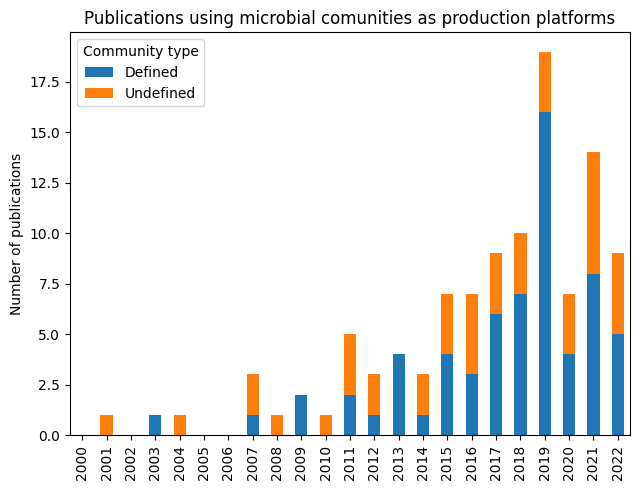

In [4]:
#Stacked bar graph showing publications per year for defined / undefined communities

grouped = df.groupby(["Year", "Community type"])
counts = grouped["Title"].count()

idx = pd.MultiIndex.from_product([range(2000,2023), ['Defined', 'Undefined']])

# Use the reindex method to create a new series with the new index
counts = counts.reindex(idx)

# Use the fillna method to fill in any missing values with 0
counts = counts.fillna(0)

#make plot
counts.unstack().plot(kind="bar", stacked=True)

plt.style.use('default')
#plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right", va="top")
#plt.tick_params(axis='x', which='major', labelsize=9)

plt.rcParams["figure.figsize"] = [6.5, 5]
plt.rcParams["figure.autolayout"] = True

plt.ylabel("Number of publications")
plt.legend(title='Community type')
plt.title("Publications using microbial comunities as production platforms")
plt.savefig("myimg.svg", format="svg")
plt.show()

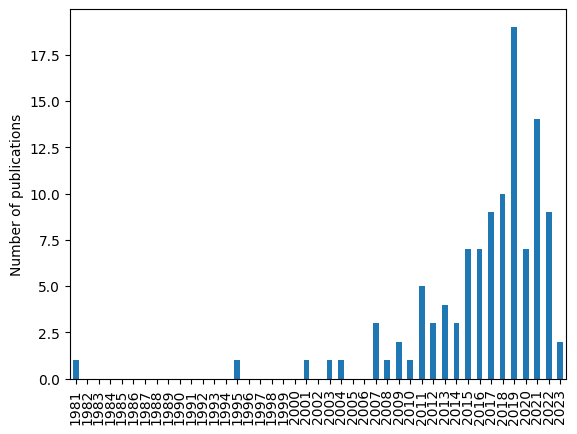

In [35]:
#Bar graph showing publications per year

#add in the years without any publications
publications_per_year = df.groupby("Year").size()
all_years = pd.Series(0, index=range(1981,2023))
publications_per_year = publications_per_year.add(all_years, fill_value=0)

#make plot
publications_per_year.plot.bar()
plt.style.use('default')
plt.ylabel("Number of publications")
plt.show()

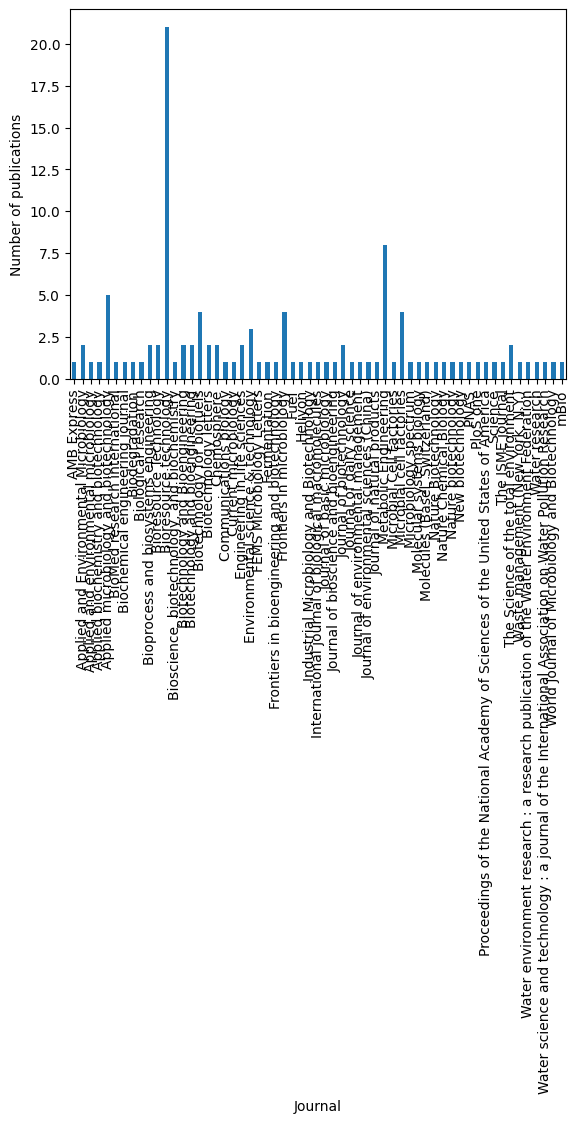

In [36]:
#Plot showing publications by journal

#add in the "missing" years
publications_per_journal = df.groupby("Journal").size()

# #make the plot
publications_per_journal.plot.bar()
plt.style.use('default')
plt.ylabel("Number of publications")
plt.show()

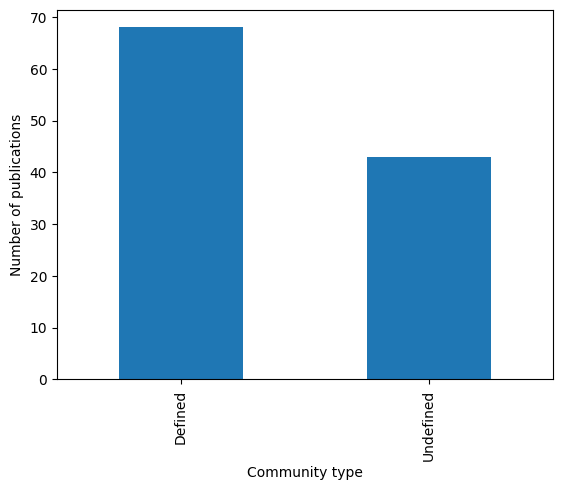

In [37]:
#Plot comparing defined / undefined

#add in the "missing" years
publications_per_journal = df.groupby("Community type").size()

# #make the plot
publications_per_journal.plot.bar()
plt.style.use('default')
plt.ylabel("Number of publications")
plt.show()

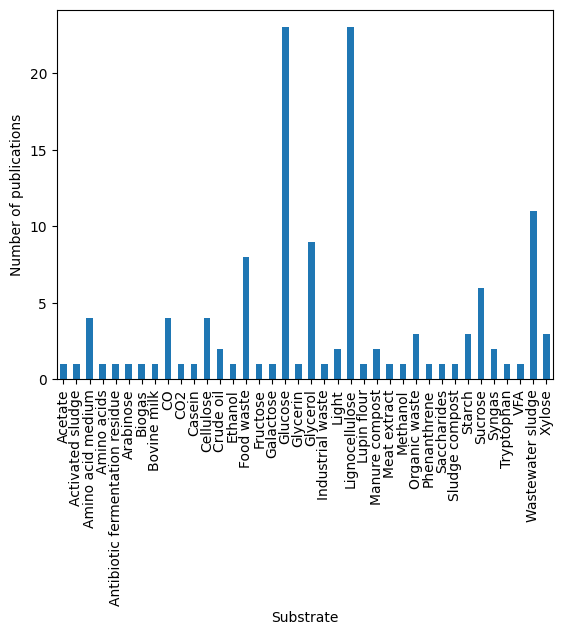

In [38]:
#Plot showing substrate

#reload (for conveniance)
df = pd.read_csv("extra_articles.csv")

s_df = df.copy()

s_df["Substrate"] = s_df["Substrate"].str.split(", ")

# Use the explode function to create a new row for each animal
s_df = s_df.explode("Substrate")

#group
substrate_per_journal = s_df.groupby("Substrate").size()

#make the plot
substrate_per_journal.plot.bar()
plt.style.use('default')
plt.ylabel("Number of publications")
plt.show()

In [39]:
s_df.groupby(["Substrate", "Community type"]).count().sort_values("Title", ascending=False)

,,PM_ID,Title,Abstract,Journal,Year,PMC_ID,DOI,Classification,Product,Organisms,Organisms (genus)
Substrate,Community type,,,,,,,,,,,
Glucose,Defined,8,19,8,19,19,8,8,8,19,19,19
Lignocellulose,Defined,5,15,5,15,15,5,5,5,15,15,15
Wastewater sludge,Undefined,10,10,10,10,10,10,10,10,10,0,0
Lignocellulose,Undefined,8,8,8,8,8,8,8,8,8,1,1
Sucrose,Defined,4,5,4,5,5,4,4,4,5,5,5
Glycerol,Defined,5,5,5,5,5,5,5,5,5,5,5
Food waste,Undefined,5,5,5,5,5,5,5,5,5,0,0
Glycerol,Undefined,4,4,4,4,4,4,4,4,4,0,0
Amino acid medium,Defined,3,4,3,4,4,3,3,3,4,4,4


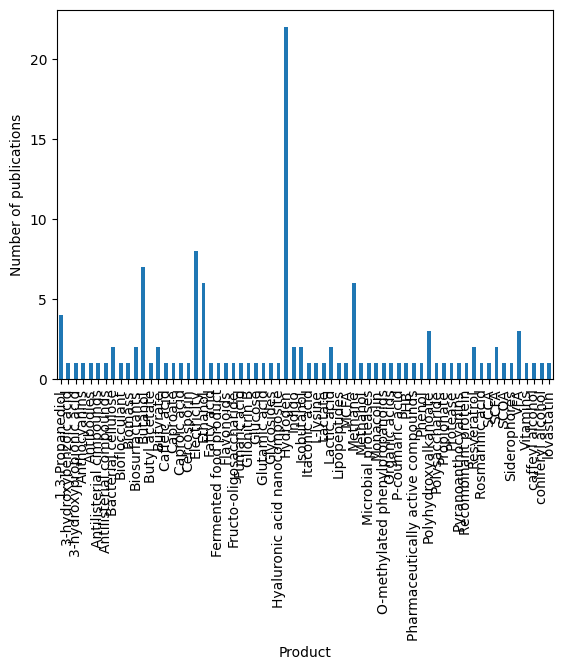

In [40]:
#reload (for conveniance)
df = pd.read_csv("extra_articles.csv")

#Plot showing product

p_df = df.copy()

p_df["Product"] = p_df["Product"].str.split(", ")

# Use the explode function to create a new row for each animal
p_df = p_df.explode("Product")

#group
product_per_journal = p_df.groupby("Product").size()

#make the plot
product_per_journal.plot.bar()
plt.style.use('default')

#plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right", va="top")

plt.ylabel("Number of publications")
plt.show()

In [41]:
p_df.groupby("Product").count().sort_values("Title", ascending=False)

,PM_ID,Title,Abstract,Journal,Year,PMC_ID,DOI,Classification,Community type,Substrate,Organisms,Organisms (genus)
Product,,,,,,,,,,,,
Hydrogen,20,22,20,22,22,20,20,20,22,22,8,8
Electricity,6,8,6,8,8,6,6,6,8,8,3,3
Butanol,1,7,1,7,7,1,1,1,7,7,7,7
Ethanol,4,6,3,6,6,4,4,3,6,6,4,4
Methane,6,6,6,6,6,6,6,6,6,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Glycosides,0,1,0,1,1,0,0,0,1,1,1,1
Hyaluronic acid nanocomposite,1,1,1,1,1,1,1,1,1,1,1,1
3-hydroxybenzoic acid,1,1,1,1,1,1,1,1,1,1,1,1


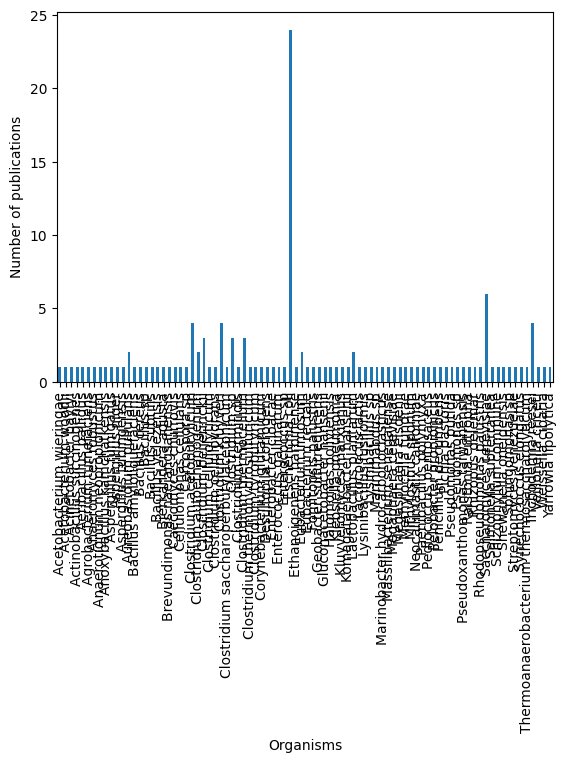

In [42]:
#reload (for conveniance)
df = pd.read_csv("extra_articles.csv")

#Plot showing organisms

o_df = df.copy()

o_df["Organisms"] = o_df["Organisms"].str.split(", ")

# Use the explode function to create a new row for each animal
o_df = o_df.explode("Organisms")

#group
organism_per_journal = o_df.groupby("Organisms").size()

#make the plot
organism_per_journal.plot.bar()
plt.style.use('default')

#plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right", va="top")

plt.ylabel("Number of publications")
plt.show()

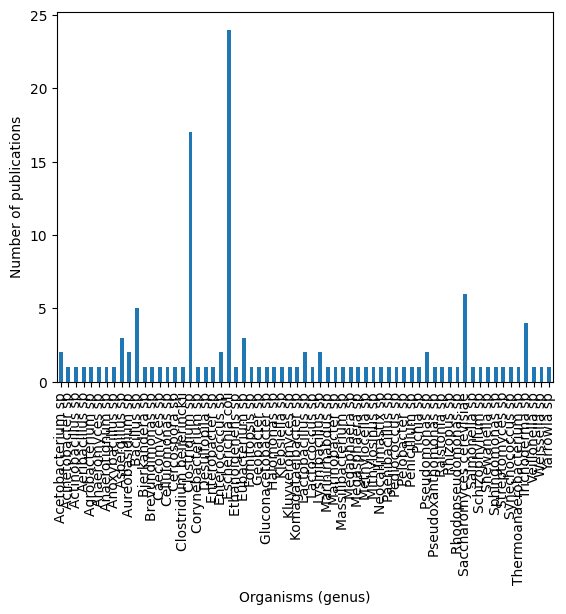

In [43]:
#reload (for conveniance)
df = pd.read_csv("extra_articles.csv")

#Plot showing organisms (model organisms and genus only)

o_df = df.copy()

o_df["Organisms (genus)"] = o_df["Organisms (genus)"].str.split(", ")

# Use the explode function to create a new row for each animal
o_df = o_df.explode("Organisms (genus)")

#group
organism_per_journal = o_df.groupby("Organisms (genus)").size()

#make the plot
organism_per_journal.plot.bar()
plt.style.use('default')

#plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right", va="top")

plt.ylabel("Number of publications")
plt.show()

In [44]:
o_df.groupby("Organisms (genus)").count().sort_values("Title", ascending=False)

,PM_ID,Title,Abstract,Journal,Year,PMC_ID,DOI,Classification,Community type,Substrate,Product,Organisms
Organisms (genus),,,,,,,,,,,,
Escherichia coli,9,24,9,24,24,9,9,9,24,24,24,24
Clostridium sp,10,17,9,17,17,10,10,9,17,17,17,17
Saccharomyces cerevisiae,3,6,3,6,6,3,3,3,6,6,6,6
Bacillus sp,5,5,5,5,5,5,5,5,5,5,5,5
Trichoderma sp,3,4,3,4,4,3,3,3,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
Lactococcus sp,1,1,1,1,1,1,1,1,1,1,1,1
Anaeromyces sp,0,1,0,1,1,0,0,0,1,1,1,1
Marinirhabdus sp,1,1,1,1,1,1,1,1,1,1,1,1
